based on the result from canberra_property_linear_regression.ipynb
all the analysis is based on the new_output.csv

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('new_output.csv')

In [4]:
df.head()

,Unnamed: 0,price,address,suburb,type,date,bed,bath,carpark,link,refer,new_price,price_int,sold_date,month
0,22,"$1,175,000",71 Newdegate Street,Deakin,house,Sold on 03 Mar 2017,3,2,2,http://www.realestate.com.au/sold/property-hou...,https://www.realestate.com.au/sold/in-2600%3b/...,1175000,1175000,"time.struct_time(tm_year=2017, tm_mon=3, tm_md...",3
1,23,"$1,700,000",30 Mueller Street,Yarralumla,house,Sold on 18 Feb 2017,4,3,2,http://www.realestate.com.au/sold/property-hou...,https://www.realestate.com.au/sold/in-2600%3b/...,1700000,1700000,"time.struct_time(tm_year=2017, tm_mon=2, tm_md...",2
2,24,"$991,000",44 Macgregor Street,Deakin,house,Sold on 18 Feb 2017,3,1,1,http://www.realestate.com.au/sold/property-hou...,https://www.realestate.com.au/sold/in-2600%3b/...,991000,991000,"time.struct_time(tm_year=2017, tm_mon=2, tm_md...",2
3,25,"$1,125,000",24 Norman Street,Deakin,house,Sold on 09 Feb 2017,4,2,1,http://www.realestate.com.au/sold/property-hou...,https://www.realestate.com.au/sold/in-2600%3b/...,1125000,1125000,"time.struct_time(tm_year=2017, tm_mon=2, tm_md...",2
4,29,"$1,450,000",25 Telopea Park,Barton,house,Sold on 21 Dec 2016,2,1,0,http://www.realestate.com.au/sold/property-hou...,https://www.realestate.com.au/sold/in-2600%3b/...,1450000,1450000,"time.struct_time(tm_year=2016, tm_mon=12, tm_m...",12


In [36]:
north=df[(df['suburb']=='Gungahlin') | (df['suburb']=='Ngunnawal') | (df['suburb']=='Harrison') | (df['suburb']=='Bonner') | (df['suburb']=='Franklin') | (df['suburb']=='Casey')]

In [58]:
north=north[north['price_int']<3000000]

In [59]:
north.count()

Unnamed: 0    3642
price         3642
address       3642
suburb        3642
type          3642
date          3642
bed           3642
bath          3642
carpark       3642
link          3642
refer         3642
new_price     3642
price_int     3642
sold_date     3642
month         3642
dtype: int64

In [60]:
north.head()

,Unnamed: 0,price,address,suburb,type,date,bed,bath,carpark,link,refer,new_price,price_int,sold_date,month
12840,21838,"$255,000",34/6 Gungahlin Place,Gungahlin,house,Sold on 14 Oct 2016,1,1,1,http://www.realestate.com.au/sold/property-hou...,https://www.realestate.com.au/sold/between-0-3...,255000,255000,"time.struct_time(tm_year=2016, tm_mon=10, tm_m...",10
12841,21840,"$320,000",47b Mary Gillespie Avenue,Gungahlin,house,Sold on 03 Aug 2016,2,1,1,http://www.realestate.com.au/sold/property-hou...,https://www.realestate.com.au/sold/between-0-3...,320000,320000,"time.struct_time(tm_year=2016, tm_mon=8, tm_md...",8
13075,22160,"$355,000",303 Anthony Rolfe Street,Gungahlin,house,Sold on 12 Dec 2008,2,2,2,http://www.realestate.com.au/sold/property-hou...,https://www.realestate.com.au/sold/between-350...,355000,355000,"time.struct_time(tm_year=2008, tm_mon=12, tm_m...",12
13076,22174,"$430,000",208 Anthony Rolfe Avenue,Gungahlin,house,Sold on 18 Feb 2011,3,2,2,http://www.realestate.com.au/sold/property-hou...,https://www.realestate.com.au/sold/between-400...,430000,430000,"time.struct_time(tm_year=2011, tm_mon=2, tm_md...",2
13077,22176,"$447,000",3 Elm Grove,Gungahlin,house,Sold on 01 Nov 2010,3,2,2,http://www.realestate.com.au/sold/property-hou...,https://www.realestate.com.au/sold/between-400...,447000,447000,"time.struct_time(tm_year=2010, tm_mon=11, tm_m...",11


In [61]:
import statsmodels.api as sm

In [62]:
X=north['bed']

In [63]:
X=sm.add_constant(X)

In [64]:
y=north['price_int']

In [65]:
linear_regression=sm.OLS(y,X)

In [66]:
fitted_model=linear_regression.fit()

In [67]:
print(fitted_model.summary())

                            OLS Regression Results                            
Dep. Variable:              price_int   R-squared:                       0.440
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                     2864.
Date:                Tue, 28 Mar 2017   Prob (F-statistic):               0.00
Time:                        12:56:03   Log-Likelihood:                -47421.
No. Observations:                3642   AIC:                         9.485e+04
Df Residuals:                    3640   BIC:                         9.486e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const       4.269e+04   9511.729      4.488      0.0

In [68]:
print(fitted_model.params)

const     42692.646619
bed      136818.570109
dtype: float64


In [70]:
import matplotlib.pyplot as plt  
import matplotlib as mpl

In [71]:
%matplotlib inline

In [72]:
x_range=[north['bed'].min(),north['bed'].max()]

In [73]:
y_range=[north['price_int'].min(),north['price_int'].max()]

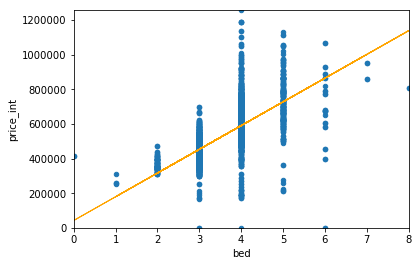

In [74]:
scatter_plot=north.plot(kind='scatter',x='bed',y='price_int',xlim=x_range,ylim=y_range)
fitted_values = fitted_model.predict(X)
regression_line=scatter_plot.plot(north['bed'],fitted_values,'-',color='orange',linewidth=1)